In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r"C:\My files\Study\MIT\MentorMind\9th Build a Content based Movie Recommender System to recommend Movies using Open source Data in Python\movies_metadata.csv")
df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


# Data Preprocessing

In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [6]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [8]:
df.isnull().sum()/len(df)

adult                    0.000000
belongs_to_collection    0.901157
budget                   0.000000
genres                   0.000000
homepage                 0.828839
id                       0.000000
imdb_id                  0.000374
original_language        0.000242
original_title           0.000000
overview                 0.020983
popularity               0.000110
poster_path              0.008490
production_companies     0.000066
production_countries     0.000066
release_date             0.001914
revenue                  0.000132
runtime                  0.005785
spoken_languages         0.000132
status                   0.001914
tagline                  0.551049
title                    0.000132
video                    0.000132
vote_average             0.000132
vote_count               0.000132
dtype: float64

# Cleaning the data
We do not need most of the columns that is present in the data.<br>
Let us use only the important variables

In [9]:
movies=df[['budget','original_title','popularity','revenue','vote_average','vote_count']]

In [10]:
print("Movies Data Shape Before Cleaning:",df.shape)
print("Movies Data Shape After Cleaning:",movies.shape)

Movies Data Shape Before Cleaning: (45466, 24)
Movies Data Shape After Cleaning: (45466, 6)


In [11]:
movies.isnull().sum()

budget            0
original_title    0
popularity        5
revenue           6
vote_average      6
vote_count        6
dtype: int64

In [14]:
(movies.isnull().sum()/(len(movies)))*100

budget            0.000000
original_title    0.000000
popularity        0.010997
revenue           0.013197
vote_average      0.013197
vote_count        0.013197
dtype: float64

In [16]:
movies.dropna(inplace=True) #dropping the null values

In [17]:
(movies.isnull().sum()/(len(movies)))*100

budget            0.0
original_title    0.0
popularity        0.0
revenue           0.0
vote_average      0.0
vote_count        0.0
dtype: float64

In [21]:
movies

,budget,original_title,popularity,revenue,vote_average,vote_count
0,30000000,Toy Story,21.946943,373554033.0,7.7,5415.0
1,65000000,Jumanji,17.015539,262797249.0,6.9,2413.0
2,0,Grumpier Old Men,11.7129,0.0,6.5,92.0
3,16000000,Waiting to Exhale,3.859495,81452156.0,6.1,34.0
4,0,Father of the Bride Part II,8.387519,76578911.0,5.7,173.0
...,...,...,...,...,...,...
45461,0,رگ خواب,0.072051,0.0,4.0,1.0
45462,0,Siglo ng Pagluluwal,0.178241,0.0,9.0,3.0
45463,0,Betrayal,0.903007,0.0,3.8,6.0
45464,0,Satana likuyushchiy,0.003503,0.0,0.0,0.0


# Lets have a look at the formula for Weighted score

## W=Weighted score
## V=Number of votes for the show <br>
## R=rating of the show <br>
## C=Average rating  for show <br>
## m=minimum number of votes required for shows on top

In [18]:
# Calculate all the components based on the above formula
v = movies['vote_count']
R = movies['vote_average']
C = movies['vote_average'].mean() #average rating
m = movies['vote_count'].quantile(0.90) #we have to select only those review which has voted count greater than  90% of total votes 

In [20]:
v = movies['vote_count']
v

0        5415.0
1        2413.0
2          92.0
3          34.0
4         173.0
          ...  
45461       1.0
45462       3.0
45463       6.0
45464       0.0
45465       0.0
Name: vote_count, Length: 45460, dtype: float64

In [24]:
C = movies['vote_average'].mean()
C

5.618207215133889

In [25]:
m = movies['vote_count'].quantile(0.90)
m

160.0

In [26]:
print("The average count required to be on the Top 10% is: ",int(m))

The average count required to be on the Top 10% is:  160


In [28]:
condition = movies['vote_count'] > m
movies_final = movies[condition]

In [29]:
movies_final

,budget,original_title,popularity,revenue,vote_average,vote_count
0,30000000,Toy Story,21.946943,373554033.0,7.7,5415.0
1,65000000,Jumanji,17.015539,262797249.0,6.9,2413.0
4,0,Father of the Bride Part II,8.387519,76578911.0,5.7,173.0
5,60000000,Heat,17.924927,187436818.0,7.7,1886.0
8,35000000,Sudden Death,5.23158,64350171.0,5.5,174.0
...,...,...,...,...,...,...
45174,0,Shot Caller,15.786854,0.0,6.9,324.0
45204,0,Girls Trip,37.964872,0.0,7.1,393.0
45258,0,Descendants 2,15.842073,0.0,7.5,171.0
45265,0,Turist,12.165685,1359497.0,6.8,255.0


# Calculating the weighted score

In [31]:
movies_final['weighted_score']=((v*R)*(C*m))/(v+m)
movies_final

,budget,original_title,popularity,revenue,vote_average,vote_count,weighted_score
0,30000000,Toy Story,21.946943,373554033.0,7.7,5415.0,6722.983575
1,65000000,Jumanji,17.015539,262797249.0,6.9,2413.0,5816.803089
4,0,Father of the Bride Part II,8.387519,76578911.0,5.7,173.0,2661.916701
5,60000000,Heat,17.924927,187436818.0,7.7,1886.0,6380.350250
8,35000000,Sudden Death,5.23158,64350171.0,5.5,174.0,2575.628410
...,...,...,...,...,...,...,...
45174,0,Shot Caller,15.786854,0.0,6.9,324.0,4152.087289
45204,0,Girls Trip,37.964872,0.0,7.1,393.0,4535.691455
45258,0,Descendants 2,15.842073,0.0,7.5,171.0,3482.949005
45265,0,Turist,12.165685,1359497.0,6.8,255.0,3755.940746


# Sorting the movies based on weighted score¶

In [33]:
movie_ranking=movies_final.sort_values('weighted_score',ascending=False)
movie_ranking.head(20)

,budget,original_title,popularity,revenue,vote_average,vote_count,weighted_score
314,25000000,The Shawshank Redemption,51.645403,2.834147e+07,8.5,8358.0,7497.239637
834,6000000,The Godfather,41.109264,2.450664e+08,8.5,6024.0,7443.070692
12481,185000000,The Dark Knight,123.167259,1.004558e+09,8.3,12269.0,7364.933106
2843,63000000,Fight Club,63.869599,1.008538e+08,8.3,9678.0,7339.637784
292,8000000,Pulp Fiction,140.950236,2.139288e+08,8.3,8670.0,7325.785901
351,55000000,Forrest Gump,48.307194,6.779454e+08,8.2,8147.0,7229.114343
522,22000000,Schindler's List,41.725123,3.213656e+08,8.3,4436.0,7201.241003
15480,160000000,Inception,29.108149,8.255328e+08,8.1,14075.0,7199.356618
23673,3300000,Whiplash,64.29999,1.309200e+07,8.3,4376.0,7197.805313
1154,18000000,The Empire Strikes Back,19.470959,5.384000e+08,8.2,5998.0,7179.568857


Text(0, 0.5, 'Movie Title')

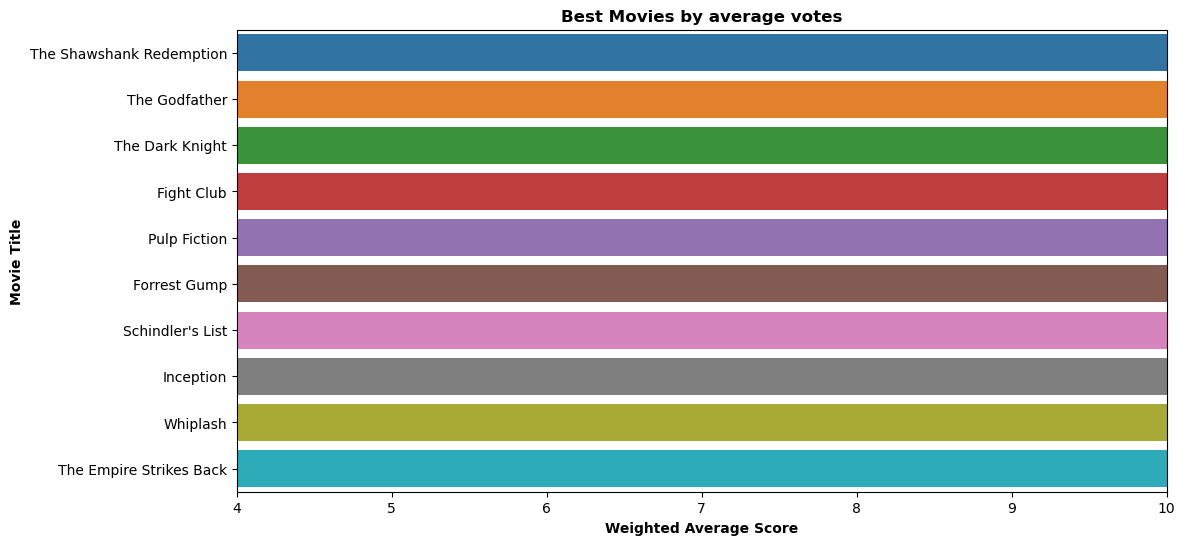

In [35]:
import seaborn as sns
from  matplotlib import pyplot as plt
weight_average=movie_ranking.sort_values('weighted_score',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=weight_average['weighted_score'].head(10), y=weight_average['original_title'].head(10), data=weight_average)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')